In [1]:
#############숫자 두르는 테두리 만들기 ###############

import cv2
import sys
import math
import cv2 as cv
import numpy as np
from time import sleep


In [2]:
#색깔의 범주 설정(추후에 사용할까 해서 적은 두 줄) ->현재코드에는 영향을 주지 x
black1 = np.array([0, 0, 0])  # 검정색 최솟값
black2 = np.array([20, 20, 20])  # 검정색 최댓값

name ="C:/Users/tmdwh/Desktop/cutting.jpg" #이미지 파일 하나 로딩

img = cv2.imread(name , cv2.IMREAD_COLOR) #이미지와 코드가 한 파일에 있어야 함(혹은 위에 경로로 초기화 해주기)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:

# 모폴로지(dilate->팽창연산 적용: 글자 잡음 제거 , erode -> 침식연산 적용 :글자 주변 잡음 제거)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) #구조화 요소 커널, 사각형 (3x3) 생성
ero_img = cv2.erode(img, k)

imgray = cv2.cvtColor(ero_img, cv2.COLOR_BGR2GRAY) #이거 안하면 이진화 불가

#cam = cv2.GaussianBlur(imgray, (3, 3), 0)  # 가우시안 블러 -> 불필요하다 생각

ret, img_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 이진화
#cv2.threshold(src, thresh, maxval, type) → retval, dst
#src => input image(gray scale image), thresh=>임계값 (이하면 흰색 아니면 검정색)-> 이 경우 255/2
#maxval ->임계값이상 나왔을때 적용할 값 -> 255 (검정)

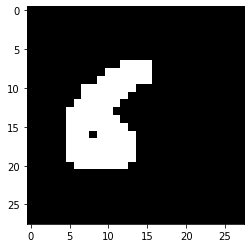

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(img_binary, cmap=mpl.cm.binary)

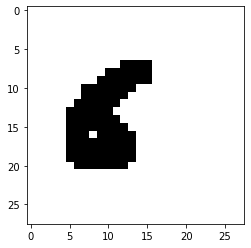

In [5]:
vers_img = 255 - img_binary #(이미지를 반전 처리 해줌) -> 컨투어(사각형 그리기)는 흰색을 기준으로 그리기 때문

plt.imshow(vers_img, cmap=mpl.cm.binary)

In [6]:
contours, hierarchy = cv2.findContours(vers_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  # 컨투어
#반전된 이미지로 컨투어를 진행

if len(contours) == 0:
    print("컨투어 0") #컨투어를 하지 못한 -> 이미지 파일 손상 등등의 문제

else:
    contr = contours[0]
    x, y, w, h = cv2.boundingRect(contr)  # 최소한의 사각형 그려주는 함수
    cv2.rectangle(img_binary, (x, y), (x + w, y + h), (0, 255, 0), 3) #(x,y)->왼쪽 하단 꼭지점, (x+w,y+h)-> 오른쪽 상단 꼭지점   
    # w: 사각형의 width, h: 사각형의 high  x: 왼쪽 아래 꼭지점의 x좌표  y: 오른쪽 위 꼭지점의 y좌표 
    # 사각형을 img_binary에 그려 주었다 -> 사각형 추후 처리해야 한다 아니면 숫자가 바뀜
    print(" x = %d, w = %d" % (x, w))
    print(" y = %d, h = %d" % (y, h))
    print(" 가로 중간값 = %f" % (x + w/2))
    print(" 세로 중간값 = %f" % (y + h/2))
    

cv.imshow("Original_image", img)  # 원본파일
cv.imshow("Thresh_binary", img_binary)  #수정파일


 x = 5, w = 11
 y = 7, h = 14
 가로 중간값 = 10.500000
 세로 중간값 = 14.000000


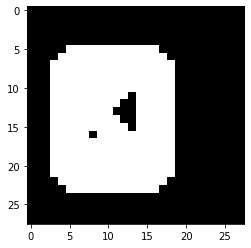

In [7]:
plt.imshow(img_binary, cmap=mpl.cm.binary)

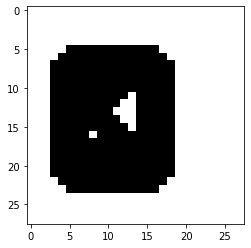

In [8]:
#확인 작업
plt.imshow(255-img_binary, cmap=mpl.cm.binary)